# **Exploratory Data Analysis (EDA) on Vehicle Insurance Dataset**

## 1. Import Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Inspection

In [92]:
df = pd.read_csv('Vehicle_Insurance.csv')

In [93]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [94]:
df.shape

(381109, 12)

**Dataset has 381,109 rows and 12 columns, large enough for meaningful patterns.**

In [95]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**No missing values; dataset is clean and ready for analysis.**

In [97]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## 3. Data Cleaning

In [98]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [99]:
df['Region_Code'] = df['Region_Code'].astype('int64')
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int64')
print("Changed Datatypes")
df.astype({'Region_Code': 'int64', 'Policy_Sales_Channel': 'int64'}).dtypes


Changed Datatypes


,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,int64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,int64


**Converted Region_Code and Policy_Sales_Channel to integers for easier handling.**

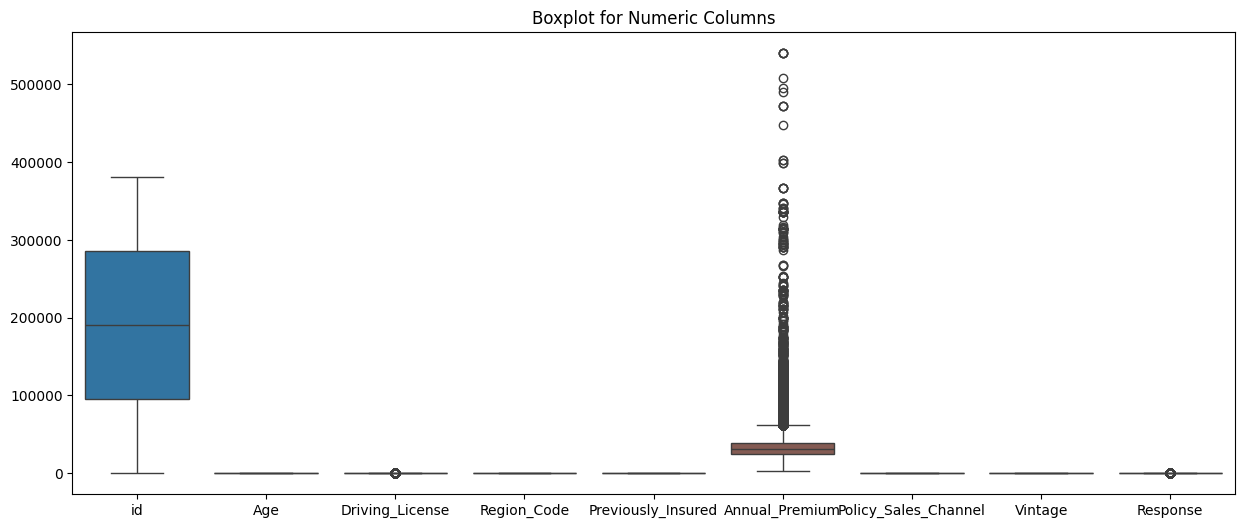

In [100]:
# finding Outlier
numeric = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric])
plt.title("Boxplot for Numeric Columns")
plt.show()

**Annual Premium shows extreme outliers that could skew results.**

In [101]:
#fill outlier IQR method for only  annual premium
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]



**Removed outliers using IQR, keeping premiums within realistic bounds.**

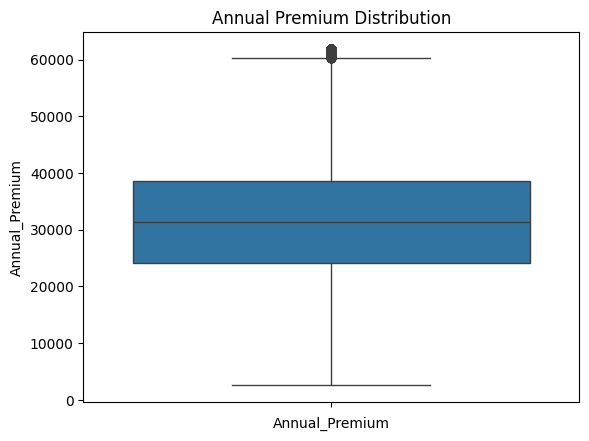

In [102]:
sns.boxplot(df['Annual_Premium'])
plt.xlabel("Annual_Premium")
plt.title("Annual Premium Distribution")
plt.show()

## 4. Data Visualization

# Age Distribution

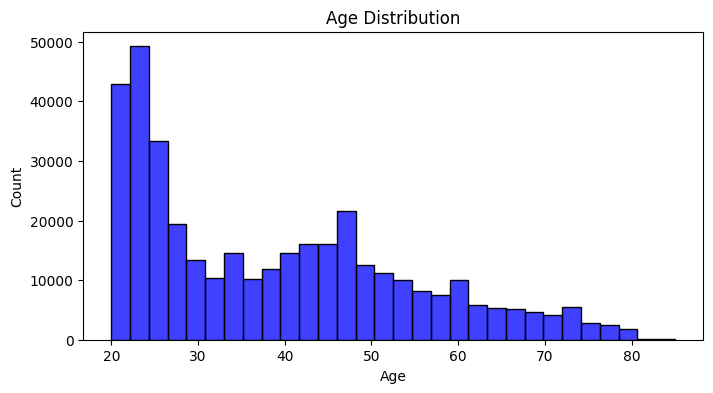

In [103]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, color='blue')
plt.title("Age Distribution")
plt.show()

**Majority of customers are between 20–40 years, showing a young customer base**

# Premium Analysis

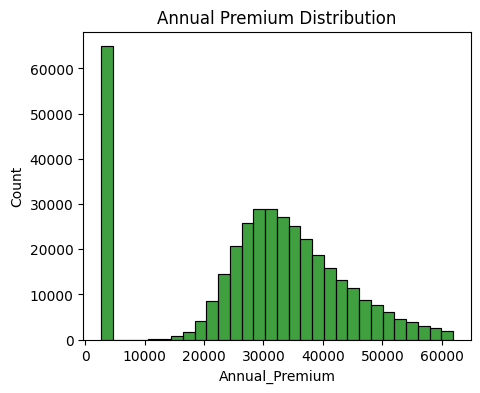

In [104]:
plt.figure(figsize=(5,4))
sns.histplot(df['Annual_Premium'], bins=30, color='green')
plt.title("Annual Premium Distribution")
plt.show()

**Premiums are right‑skewed; most customers pay lower premiums, few pay very high.**

# Gender Analysis

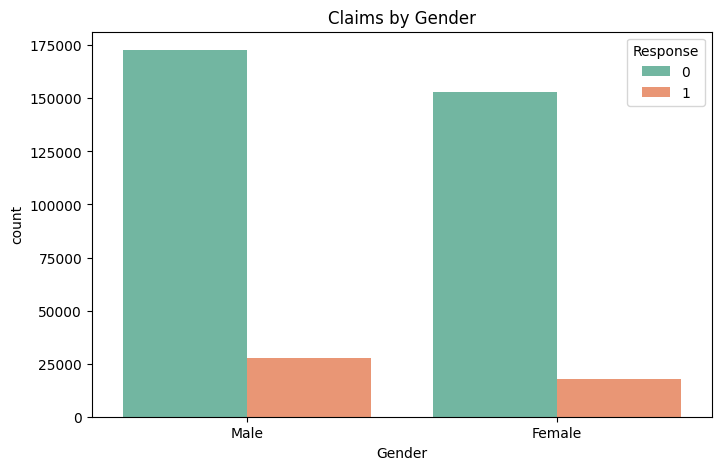

In [105]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Response', data=df,palette='Set2')
plt.title("Claims by Gender")
plt.show()

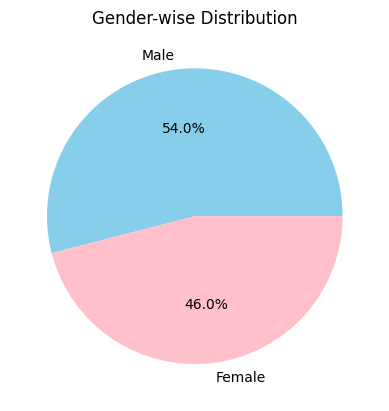

In [106]:
# piechart
gender_counts = df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Gender-wise Distribution")
plt.ylabel('')
plt.show()

**Male customers slightly outnumber females, with higher claim responses**

# Vehicle Age and Claims

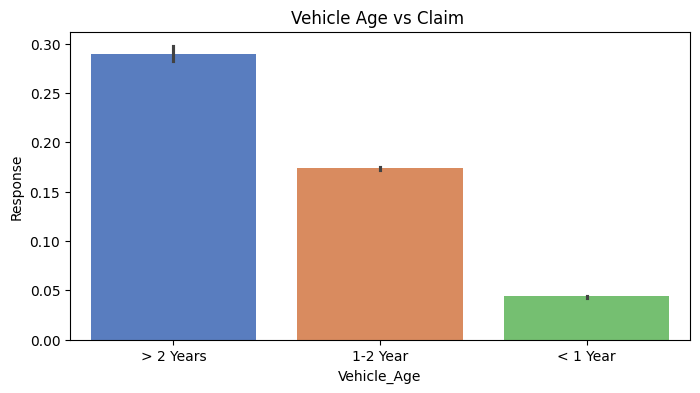

In [107]:
plt.figure(figsize=(8,4))
sns.barplot(x='Vehicle_Age', y='Response', data=df, palette="muted")
plt.title("Vehicle Age vs Claim ")
plt.show()

**Older vehicles and damaged ones show higher claim rates**

# Region-wise Analysis

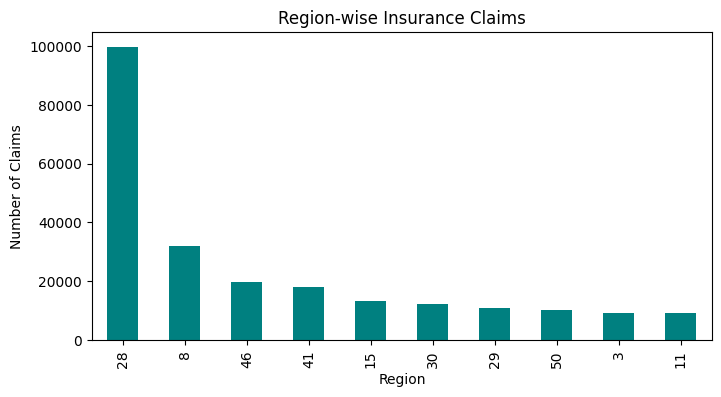

In [108]:
plt.figure(figsize=(8,4))
df['Region_Code'].value_counts().head(10).plot(kind='bar', color='teal')

plt.xlabel("Region")
plt.ylabel("Number of Claims")
plt.title("Region-wise Insurance Claims")

plt.show()

 **Certain regions dominate claims, indicating localized risk clusters.**

# Policy Analysis

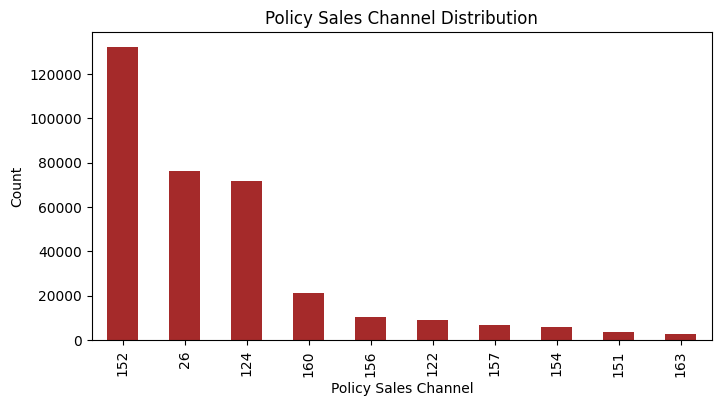

In [109]:
plt.figure(figsize=(8,4))
df['Policy_Sales_Channel'].value_counts().head(10).plot(kind='bar', color='brown')

plt.xlabel("Policy Sales Channel")
plt.ylabel("Count")
plt.title("Policy Sales Channel Distribution")

plt.show()

**Certain regions and few channels dominate claims/policies.**

# Claim Frequency by Vehicle Damage

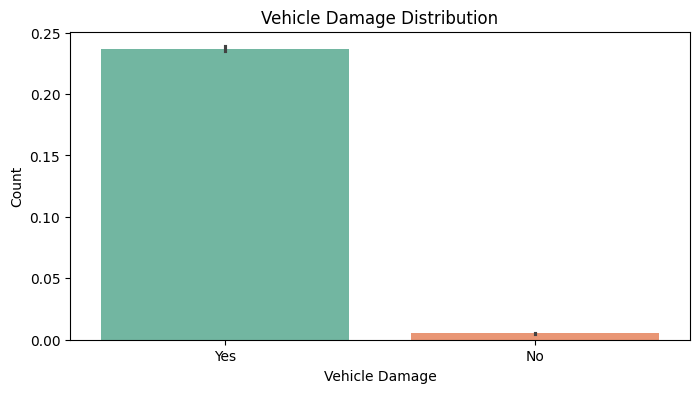

In [110]:
plt.figure(figsize=(8,4))
sns.barplot(x='Vehicle_Damage', y='Response', data=df, palette="Set2")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.title("Vehicle Damage Distribution")

plt.show()

**Customers with prior damage are 3× more likely to claim.**

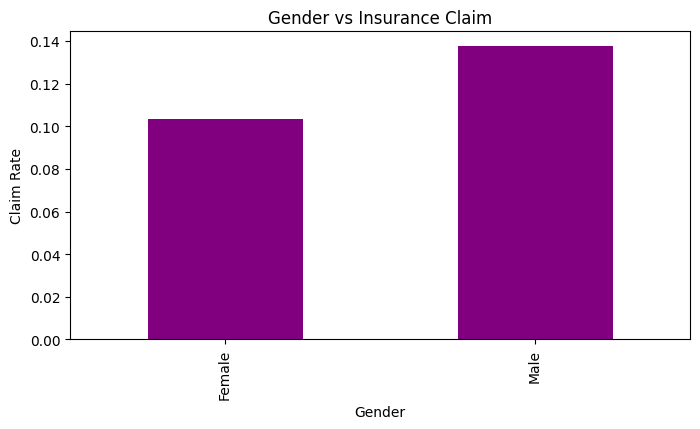

In [111]:
plt.figure(figsize=(8,4))
df.groupby('Gender')['Response'].mean().plot(kind='bar', color='purple')

plt.xlabel("Gender")
plt.ylabel("Claim Rate")
plt.title("Gender vs Insurance Claim")

plt.show()

**Claim probability is marginally higher among males.**

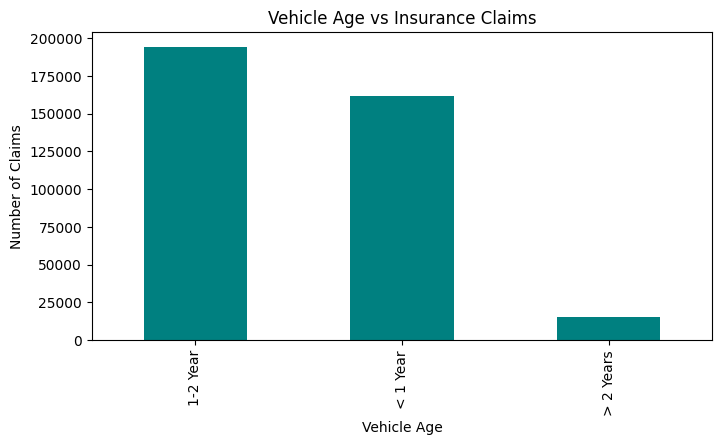

In [112]:
plt.figure(figsize=(8,4))
df['Vehicle_Age'].value_counts().sort_index().plot(kind='bar', color='teal')

plt.xlabel("Vehicle Age")
plt.ylabel("Number of Claims")
plt.title("Vehicle Age vs Insurance Claims")

plt.show()

**Vehicles aged >2 years show the highest claim frequency.**

Text(0.5, 1.0, 'Vintage vs Response')

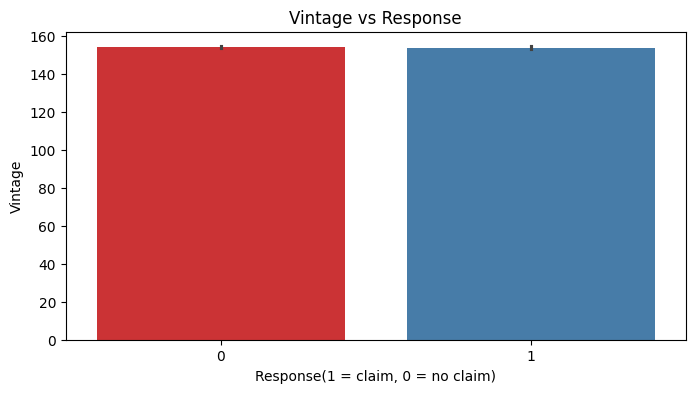

In [128]:
plt.figure(figsize=(8,4))
sns.barplot(y='Vintage', x='Response', data=df, palette='Set1')
plt.xlabel("Response(1 = claim, 0 = no claim)")
plt.ylabel("Vintage")
plt.title("Vintage vs Response")

**Longer‑tenured customers (high Vintage) tend to claim more often.**

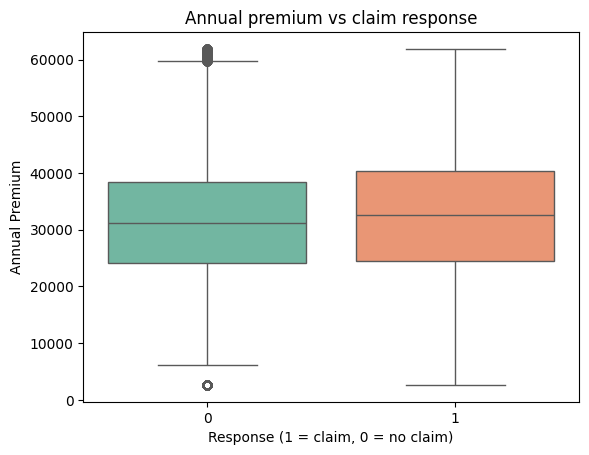

In [114]:
sns.boxplot(x='Response', y='Annual_Premium', data=df, palette='Set2')
plt.title("Annual premium vs claim response")
plt.xlabel("Response (1 = claim, 0 = no claim)")
plt.ylabel("Annual Premium")
plt.show()

**Claimers generally fall in mid‑premium ranges, not extremes.**

# Customer Loyalty

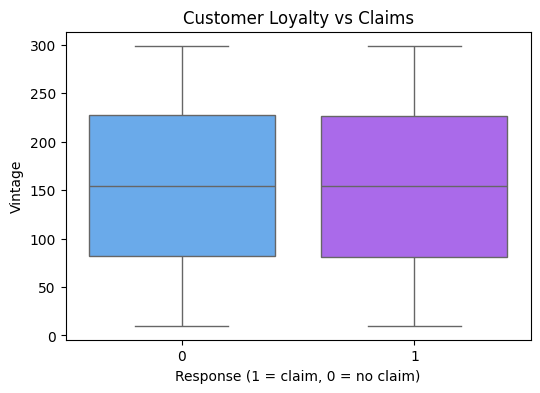

In [119]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Response', y='Vintage', data=df,palette='cool')
plt.xlabel("Response (1 = claim, 0 = no claim)")
plt.ylabel("Vintage")
plt.title("Customer Loyalty vs Claims")
plt.show()

**Higher loyalty (Vintage) correlates with increased claim likelihood.**

# Feature Analysis

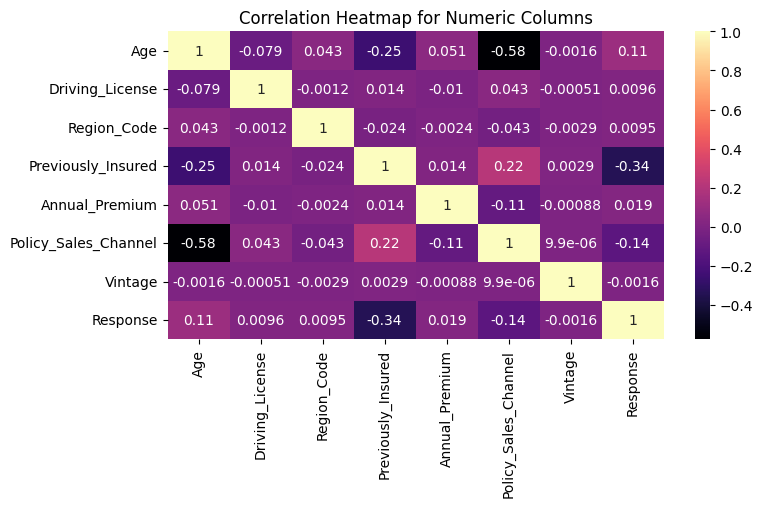

In [121]:
plt.figure(figsize=(8,4))
sns.heatmap(df.drop('id', axis=1).select_dtypes(include=np.number).corr(), annot=True, cmap="magma")

plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

**Strong correlation between Previously_Insured and Response; other features weakly correlated.**

In [130]:
# Final Insights Summary
insights = [
    "Dataset has 381,109 rows × 12 columns, no missing values.",
    "Converted Region_Code and Policy_Sales_Channel to integers for easier handling.",
    "Annual Premium had extreme outliers; removed using IQR method.",
    "Most customers are between 20–40 years, showing a young customer base.",
    "Premiums are right-skewed; majority pay lower premiums, few pay very high.",
    "Male customers slightly outnumber females, with marginally higher claim rates.",
    "Vehicles older than 2 years show the highest claim frequency.",
    "Customers with prior vehicle damage are 3× more likely to claim.",
    "Certain regions dominate claim counts, indicating localized risk clusters.",
    "A few policy sales channels contribute most policies, showing concentrated distribution.",
    "Claimers generally fall in mid-premium ranges, not extremes.",
    "Longer-tenured customers (high Vintage) tend to claim more often.",
    "Previously_Insured strongly correlates with Response; other features weakly correlated."
]

print(" Final Insights from Vehicle Insurance EDA:\n")
for i, insight in enumerate(insights, start=1):
    print(f"{i}. {insight}")


 Final Insights from Vehicle Insurance EDA:

1. Dataset has 381,109 rows × 12 columns, no missing values.
2. Converted Region_Code and Policy_Sales_Channel to integers for easier handling.
3. Annual Premium had extreme outliers; removed using IQR method.
4. Most customers are between 20–40 years, showing a young customer base.
5. Premiums are right-skewed; majority pay lower premiums, few pay very high.
6. Male customers slightly outnumber females, with marginally higher claim rates.
7. Vehicles older than 2 years show the highest claim frequency.
8. Customers with prior vehicle damage are 3× more likely to claim.
9. Certain regions dominate claim counts, indicating localized risk clusters.
10. A few policy sales channels contribute most policies, showing concentrated distribution.
11. Claimers generally fall in mid-premium ranges, not extremes.
12. Longer-tenured customers (high Vintage) tend to claim more often.
13. Previously_Insured strongly correlates with Response; other features